# Title: Multilabel text classification

### Problem statement: 
#### To Develop a multi-label text classification model that accurately predicts the probabilities of a given text belonging to multiple predefined classes. The task involves working with a dataset containing features extracted from text n-grams, including 145 features of numerical, boolean, and categorical types.

##### Features
###### For a given nGram several features have been extracted (145). These features have been saved in the train.csvand test.csv. They have parsing, spatial, content and relative information.
1) Content: The cryptographic hash of the raw text.
2) Parsing: nGram is a number, text, alphanumeric, etc.
3) Spatial: Position and size of the nGram
4) Relational: details of text nearby the nGram

The feature values can be:

1) Numbers. Continuous/discrete numerical values.
2) Boolean. The values include YES (true) or NO (false).
3) Categorical. Values within a finite set of possible values.

###### Labels
1) This are the labels corresponding to the probability that the current sample belongs to the given class. This is multilabel problem and hence a given sample can belong to more than one class.

#### File description
1) train.csv: This file contains the feature for training set
2) trainlabels.csv: This file contains the label for training set
3) test.csv: This file contains testing data
4) sampleSubmissions.csv: This file contains sample submission format

# Importing essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# the get the images/libraries displayed over here only
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Loading dataset

In [4]:
train_df= pd.read_csv('train.csv')

In [5]:
# first view of the feature dataset
train_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


In [6]:
# getting the shape of the train_df
train_df.shape

(9999, 146)

In [7]:
# knowing the columns of train_df
train_df.columns

Index(['id', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x136', 'x137', 'x138', 'x139', 'x140', 'x141', 'x142', 'x143', 'x144',
       'x145'],
      dtype='object', length=146)

In [8]:
# info() is used to summaries the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 146 entries, id to x145
dtypes: float64(55), int64(31), object(60)
memory usage: 11.1+ MB


In [9]:
train_df.dtypes

id        int64
x1       object
x2       object
x3       object
x4       object
         ...   
x141     object
x142     object
x143      int64
x144    float64
x145    float64
Length: 146, dtype: object

In [10]:
# describe is used to check the numberical columns the min, max, 50% etc of each columns
train_df.describe()

,id,x5,x6,x7,x8,x9,x15,x16,x17,x18,...,x133,x134,x135,x136,x137,x138,x139,x143,x144,x145
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.000000,0.964933,0.053623,0.791668,0.172705,0.448091,6.056806,0.418593,4.483448,8.073907,...,9.291529,8.800880,0.933771,0.056523,0.924781,2669.290629,2142.907091,3.667767,0.519482,0.505084
std,2886.607005,0.524688,0.128503,0.353194,0.329020,0.300549,8.756490,0.294579,4.388639,7.032278,...,7.576648,6.584598,0.069921,1.520931,0.118496,1588.220409,1386.559408,11.014722,0.270886,0.256323
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-0.098334,-17.000000,0.000000,892.000000,838.000000,0.000000,0.021635,0.001327
25%,2500.500000,0.642796,0.000000,0.831299,0.000000,0.199617,1.000000,0.165599,2.000000,3.000000,...,4.000000,4.000000,0.916144,0.000000,0.880000,1262.000000,892.000000,1.000000,0.267939,0.306031
50%,5000.000000,1.285541,0.000000,0.960637,0.000000,0.439504,3.000000,0.395740,4.000000,7.000000,...,7.000000,7.000000,0.949552,0.000000,1.000000,1263.000000,918.000000,2.000000,0.517937,0.484561
75%,7499.500000,1.414798,0.058076,1.000000,0.151543,0.682880,7.000000,0.683908,6.000000,11.000000,...,13.000000,12.000000,0.972222,0.000000,1.000000,4672.000000,3308.000000,5.000000,0.759242,0.707324
max,9999.000000,1.474916,0.992745,1.000000,1.393289,1.098257,88.000000,1.180828,132.000000,118.000000,...,84.000000,118.000000,0.999947,23.000000,1.000000,5217.000000,6622.000000,697.000000,1.238562,1.086371


In [11]:
# Count the exact number of columns that contain missing values
list_of_missing_columns= [features for features in train_df.columns if train_df[features].isnull().sum()>0]
print(f'The total number of missing values in train_df is {len(list_of_missing_columns)}')

The total number of missing values in train_df is 48


In [12]:
# loading label dataset
train_labels_df= pd.read_csv('trainLabels.csv')

In [13]:
# first view of the label dataset
train_labels_df.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# knowing the shape of the dataset
train_labels_df.shape

(49999, 34)

In [15]:
# knowing the columns of the datset
train_labels_df.columns

Index(['id', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30',
       'y31', 'y32', 'y33'],
      dtype='object')

In [16]:
# info() is used to summaries the dataframe
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      49999 non-null  int64
 1   y1      49999 non-null  int64
 2   y2      49999 non-null  int64
 3   y3      49999 non-null  int64
 4   y4      49999 non-null  int64
 5   y5      49999 non-null  int64
 6   y6      49999 non-null  int64
 7   y7      49999 non-null  int64
 8   y8      49999 non-null  int64
 9   y9      49999 non-null  int64
 10  y10     49999 non-null  int64
 11  y11     49999 non-null  int64
 12  y12     49999 non-null  int64
 13  y13     49999 non-null  int64
 14  y14     49999 non-null  int64
 15  y15     49999 non-null  int64
 16  y16     49999 non-null  int64
 17  y17     49999 non-null  int64
 18  y18     49999 non-null  int64
 19  y19     49999 non-null  int64
 20  y20     49999 non-null  int64
 21  y21     49999 non-null  int64
 22  y22     49999 non-null  int64
 23  y23     499

In [17]:
# first view of the label dataset
train_labels_df.describe()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,...,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,25000.000000,0.005620,0.000660,0.021060,0.013260,0.000180,0.074681,0.038001,0.000720,0.077502,...,0.017840,0.002720,0.010680,0.009500,0.009700,0.031381,0.022900,0.028921,0.056161,0.560351
std,14433.612391,0.074757,0.025682,0.143587,0.114388,0.013415,0.262879,0.191200,0.026824,0.267388,...,0.132372,0.052084,0.102793,0.097006,0.098012,0.174346,0.149588,0.167585,0.230235,0.496349
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12500.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37499.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,49999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
import string

# Generating column names like Excel (A to Z, then AA to AZ, and so on)
def generate_excel_columns(num_columns):
    columns = []
    for i in range(num_columns):
        col_name = ''
        quotient, remainder = divmod(i, 26)
        while quotient > 0:
            col_name = string.ascii_uppercase[remainder] + col_name
            quotient, remainder = divmod(quotient - 1, 26)
        col_name = string.ascii_uppercase[remainder] + col_name
        columns.append(col_name)
    return columns


In [19]:
# Generating 146 column names
column_names = generate_excel_columns(146)

In [20]:
# Now reading the CSV with these column names
test = pd.read_csv('C:\\Users\\admin\\Desktop\\test.csv', names=column_names)

In [21]:
# first look at the test dataframe
test.head()

,A,B,C,D,E,F,G,H,I,J,...,EG,EH,EI,EJ,EK,EL,EM,EN,EO,EP
0,1698001,NO,NO,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.414798,0.000000,1.000000,0.000000,0.202060,...,0.0,1.000000,1262,892,NO,NO,NO,0,0.089686,0.193344
1,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
2,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
3,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
4,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909


In [22]:
# checking the shape of the test dataframe
test.shape

(2000, 146)

In [23]:
# getting the missing value counts from the test dataframe
test.isnull().sum()

A       0
B     294
C     294
D     294
E     294
     ... 
EL      0
EM      0
EN      0
EO      0
EP      0
Length: 146, dtype: int64

In [24]:
# counting the number of missing value columns
k= [features for features in test.columns if test[features].isnull().sum()>0]
print(len(k))

48


In [25]:
# dropping columns with missing values
test= test.drop(k, axis=1)

In [26]:
# test= test.drop(['A'], axis=1)

In [27]:
test.shape

(2000, 98)

In [28]:
# getting the categorical columns from merged_df to feature encoding
cols=[]
for col in test.columns:
    if test[col].dtype == 'object':
        cols.append(col)
# Here cols is my list of categorical columns in merged_df
print(cols)

['AE', 'AF', 'BJ', 'CN', 'DW', 'DX', 'DY', 'DZ', 'EA', 'EK', 'EL', 'EM']


In [29]:
from sklearn.preprocessing import LabelEncoder
# using labelencoder to convert all the categorical values in each column into a numerical format, this help making the data easier for the machine learning process
encoder = LabelEncoder()
for col in cols:
    test[col] = encoder.fit_transform(test[col])

In [30]:
test.head()

,A,F,G,H,I,J,P,Q,R,S,...,EG,EH,EI,EJ,EK,EL,EM,EN,EO,EP
0,1698001,1.414798,0.000000,1.000000,0.000000,0.202060,4,0.096413,28,2,...,0.0,1.000000,1262,892,0,0,0,0,0.089686,0.193344
1,1698002,0.832679,0.049834,0.945938,0.317427,0.482021,3,0.895500,6,7,...,1.0,0.866667,4672,3311,0,0,0,5,0.945032,0.471318
2,1698003,1.415919,0.000000,1.000000,0.000000,0.703088,4,0.536996,2,10,...,-1.0,1.000000,1263,892,0,0,0,8,0.557175,0.693587
3,1698004,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,...,0.0,0.870000,4672,3306,1,0,1,0,0.870538,0.405822
4,1698005,1.129212,0.087020,0.814240,1.112804,0.874318,5,0.238793,3,10,...,0.0,0.870000,4400,3413,1,0,1,2,0.224729,0.870909


# observations
1) Train.csv i.e train_df has 146 columns and 9999 rows
2) A total of 48 columns having missing values in train_df
3) In trainlabel_df, values are in the form of 0 and 1
4) The shape of trainlabel_df is 34 columns with 49999 rows
5) there is no missing value in this dataframe
6) The size of test dataframe is 98 columns and 2000 rows

## Data Wrangling

In [31]:
# Merging combines features dataset and labels dataset for better model training 
merged_df = pd.merge(train_df, train_labels_df, on='id', how='inner')

In [32]:
# merged_df = merged_df.drop('id', axis=1)

In [33]:
# getting view of merged_df
merged_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0,0,0,0,0,0,0,0,0,1
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0,0,0,0,0,0,0,0,0,0
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0,0,0,0,0,0,0,0,0,1
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0,0,0,0,0,0,0,0,0,1


In [34]:
# knowing the shape i.e rows and columns of merged_df
kan= merged_df.shape
print(f'the number of rows are {kan[0]}\nthe number of columns are {kan[1]}')

the number of rows are 9999
the number of columns are 179


In [35]:
# checking the type of each column in merged_df
merged_df.dtypes

id      int64
x1     object
x2     object
x3     object
x4     object
        ...  
y29     int64
y30     int64
y31     int64
y32     int64
y33     int64
Length: 179, dtype: object

In [36]:
merged_df.isnull().sum()

id        0
x1     1426
x2     1426
x3     1426
x4     1426
       ... 
y29       0
y30       0
y31       0
y32       0
y33       0
Length: 179, dtype: int64

In [37]:
# Count the exact number of columns that contain missing values
list_of_missing_columns= [features for features in merged_df.columns if merged_df[features].isnull().sum()>0]
print(len(list_of_missing_columns))

48


In [38]:
# importing missingno to visualize the missing values in merged_df
import missingno as msno

<AxesSubplot: >

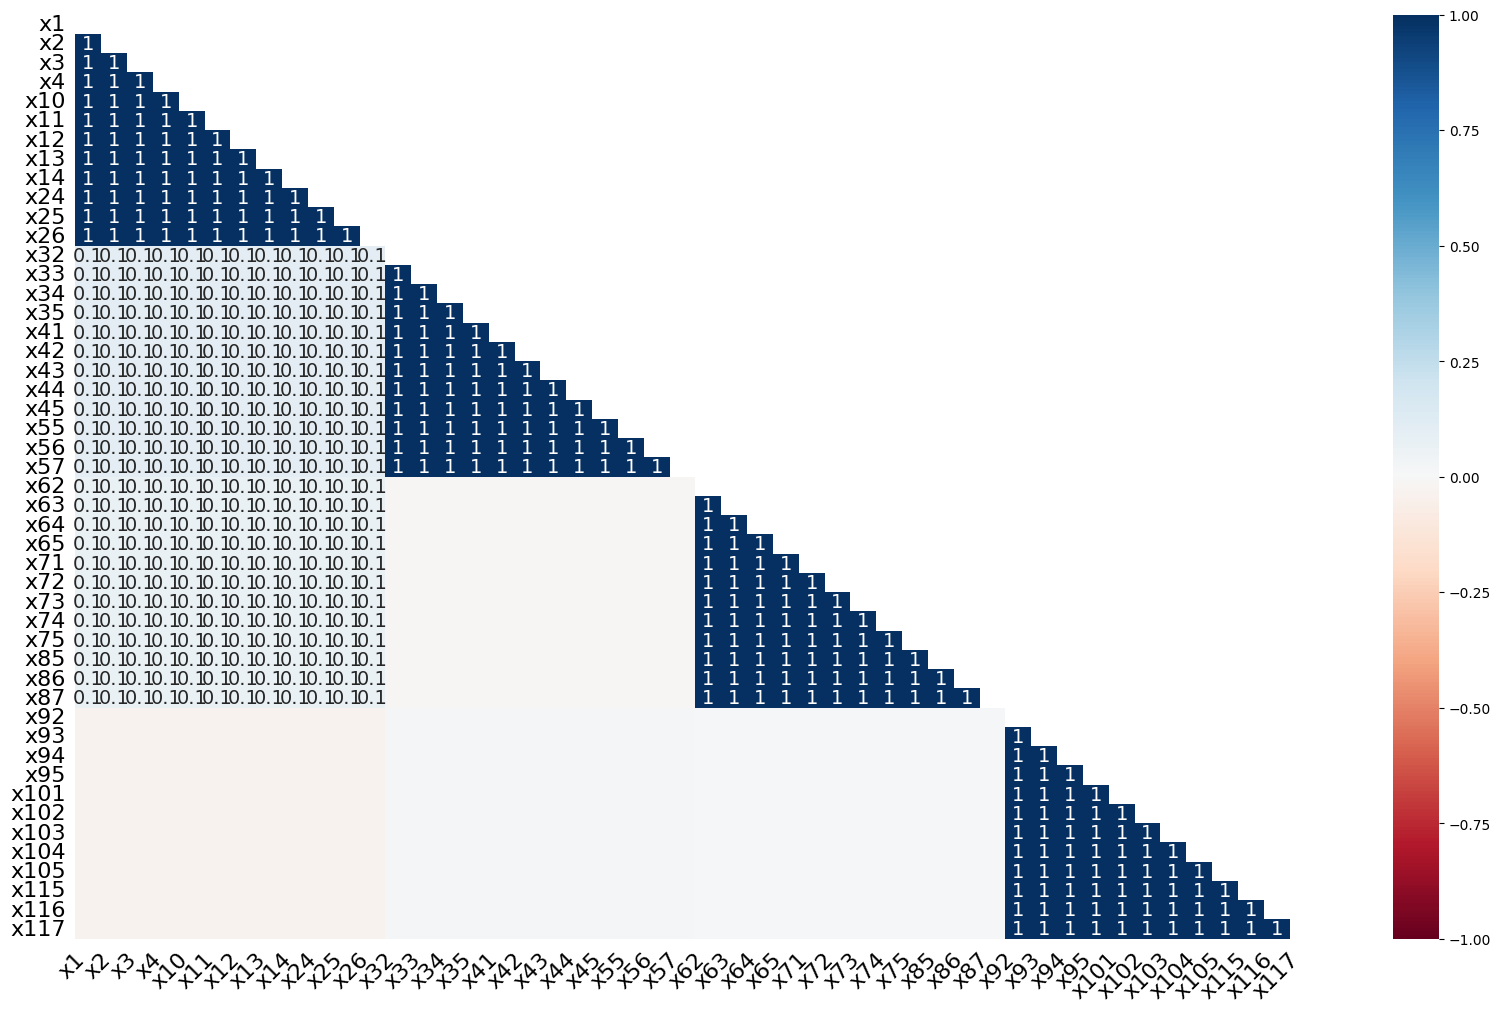

In [39]:
# visualization of missing values in merged_df
msno.heatmap(merged_df)

# Observation
1) Merged_df contain 179 columns with 9999 rows
2) there are missing values in merged_df
3) columns like x1, x2, x3,x4 has 1426 missing values

# Feature engineering & Data pre-processing

In [40]:
# dropping all the missing columns from merged_df 
merged_df= merged_df.drop(list_of_missing_columns, axis=1)

In [41]:
# Impute missing values with the mean value
merged_df = merged_df.fillna(merged_df.mean())

In [42]:
merged_df.head()

,id,x5,x6,x7,x8,x9,x15,x16,x17,x18,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,0.576561,0.073139,0.481394,0.115697,0.472474,42,0.396065,3,6,...,0,0,0,0,0,0,0,0,0,1
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1.341803,0.051422,0.935572,0.041440,0.501710,2,0.838475,3,5,...,0,0,0,0,0,0,0,0,0,0
3,4,0.653912,0.041471,0.940787,0.090851,0.556564,37,0.127405,8,15,...,0,0,0,0,0,0,0,0,0,1
4,5,1.415919,0.000000,1.000000,0.000000,0.375297,1,0.523543,4,11,...,0,0,0,0,0,0,0,0,0,1


In [43]:
merged_df.shape

(9999, 131)

In [44]:
# getting the categorical columns from merged_df to feature encoding
cols=[]
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        cols.append(col)
# Here cols is my list of categorical columns in merged_df
print(cols)

['x30', 'x31', 'x61', 'x91', 'x126', 'x127', 'x128', 'x129', 'x130', 'x140', 'x141', 'x142']


In [45]:
from sklearn.preprocessing import LabelEncoder

# using labelencoder to convert all the categorical values in each column into a numerical format, this help making the data easier for the machine learning process
encoder = LabelEncoder()
for col in cols:
    merged_df[col] = encoder.fit_transform(merged_df[col])

In [46]:
# getting the categorical columns from merged_df to feature encoding
cols=[]
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        cols.append(col)
# Here cols is my list of categorical columns in merged_df
print(cols)

[]


In [47]:
# checking for any missing value in merged_df
merged_df.isnull().sum()

id     0
x5     0
x6     0
x7     0
x8     0
      ..
y29    0
y30    0
y31    0
y32    0
y33    0
Length: 131, dtype: int64

In [48]:
# Min max scaler is a feature scaling technique that normalizes the data in a dataset to a specific range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the merged_df
merged_df= pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)

In [49]:
merged_df.head()

,id,x5,x6,x7,x8,x9,x15,x16,x17,x18,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0.0000,0.390911,0.073674,0.481394,0.083039,0.430204,0.477273,0.335413,0.022727,0.050847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0002,0.909748,0.051797,0.935572,0.029742,0.456824,0.022727,0.710074,0.022727,0.042373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0003,0.443355,0.041774,0.940787,0.065206,0.506770,0.420455,0.107895,0.060606,0.127119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0004,0.960000,0.000000,1.000000,0.000000,0.341721,0.011364,0.443369,0.030303,0.093220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


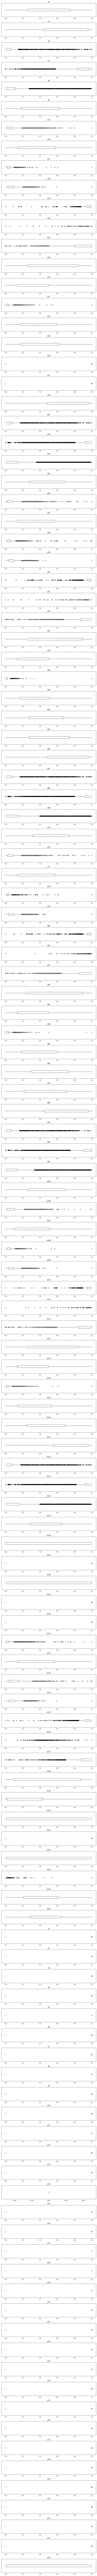

In [50]:
# Set up the figure and axis for subplots
fig, axes = plt.subplots(nrows=merged_df.shape[1], figsize=(10, 2 * merged_df.shape[1]))

# Iterate over each column and create a boxplot
for i, column in enumerate(merged_df.columns):
    axes[i].boxplot(merged_df[column], vert=False)  # vert=False for horizontal boxplot
    axes[i].set_title(column)  # Set the title to the column name
    axes[i].set_yticklabels([])  # Remove y-axis labels for better visualization

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Showing the plot
plt.show()

In [51]:
# creating function for removing the outliers from the dataframe
def treat_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values at the lower and upper bounds
    column = np.clip(column, lower_bound, upper_bound)
    
    return column

In [52]:
# Applying outlier treatment only to columns starting with 'x'
merged_df.loc[:, merged_df.columns[merged_df.columns.str.startswith('x')]] = \
    merged_df.loc[:, merged_df.columns[merged_df.columns.str.startswith('x')]].apply(treat_outliers)

In [53]:
merged_df.head()

,id,x5,x6,x7,x8,x9,x15,x16,x17,x18,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0.0000,0.390911,0.073674,0.578246,0.083039,0.430204,0.181818,0.335413,0.022727,0.050847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0001,0.000000,0.000000,0.578246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0002,0.909748,0.051797,0.935572,0.029742,0.456824,0.022727,0.710074,0.022727,0.042373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0003,0.443355,0.041774,0.940787,0.065206,0.506770,0.181818,0.107895,0.060606,0.127119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0004,0.960000,0.000000,1.000000,0.000000,0.341721,0.011364,0.443369,0.030303,0.093220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


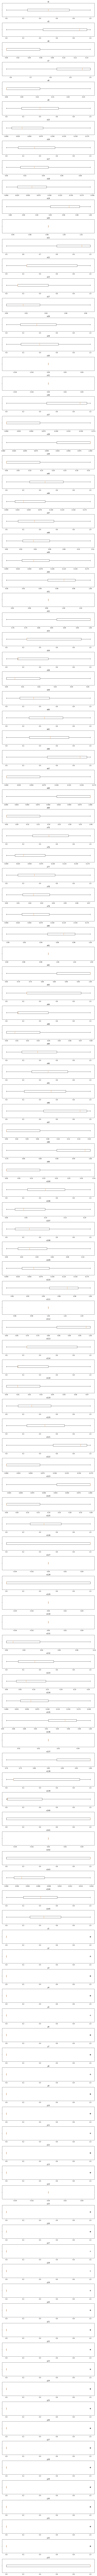

In [54]:
# Set up the figure and axis for subplots
fig, axes = plt.subplots(nrows=merged_df.shape[1], figsize=(10, 2 * merged_df.shape[1]))

# Iterate over each column and create a boxplot
for i, column in enumerate(merged_df.columns):
    axes[i].boxplot(merged_df[column], vert=False)  # vert=False for horizontal boxplot
    axes[i].set_title(column)  # Set the title to the column name
    axes[i].set_yticklabels([])  # Remove y-axis labels for better visualization

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Showing the plot
plt.show()

# ML model implementation

In [55]:
# separating x and y for model training

In [56]:
x= merged_df.drop(['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30',
       'y31', 'y32', 'y33'], axis= 1)

In [57]:
y= merged_df[['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30',
       'y31', 'y32', 'y33']]

In [58]:
# checking shape of x and y
print(x.shape)
print(y.shape)

(9999, 98)
(9999, 33)


In [59]:
# Spliting the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

## Random forest classifier

In [60]:
# initializing random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Training the model
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [61]:
# getting the training score of the rf_classifier
rf_classifier.score(x_train,y_train)

0.7255906988373547

In [62]:
# getting the validation score of the rf_classifier
rf_classifier.score(x_valid,y_valid)

0.6405

In [63]:
# getting the y_pred value 
y_pred = rf_classifier.predict(x_valid)

In [64]:
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [65]:
# Evaluating the model
y_pred = rf_classifier.predict(x_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         1
           2       0.90      0.42      0.57        43
           3       1.00      0.29      0.45        34
           4       0.00      0.00      0.00         0
           5       0.85      0.50      0.63       151
           6       1.00      0.10      0.18        72
           7       0.00      0.00      0.00         0
           8       0.86      0.48      0.62       139
           9       1.00      0.12      0.21        34
          10       0.00      0.00      0.00         3
          11       0.67      0.42      0.52       142
          12       1.00      0.35      0.52        20
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         6
          15       1.00      0.38      0.55        21
          16       0.00      0.00      0.00         0
          17       0.00    

In [66]:
# predicting the test values using rf_classifier
prediction= rf_classifier.predict(test)

In [67]:
# finding the index of the highest predicted probability for each sample.
predicted_labels = np.argmax(prediction, axis=1)

In [68]:
# Creating a dataFrame for submission
submission_df = pd.DataFrame()

y_range = range(1, 35)
val = []

# Combining A i.e ids and y values into labels
for i in test['A']:
    combinations = [f"{i}_y{y}" for y in y_range]
    val.append(combinations)

flat_data = [item for sublist in val for item in sublist]

# Creating a list of predicted values for each row
predict = [(predicted_labels[index] == (j - 1)).astype(float) for index in range(len(test['A'])) for j in range(1, 35)]

# converting the 'pred' column to int
predict = [pred.astype(int) for pred in predict]

# creating columns for the submission dataframe with values
submission_df['id_label'] = flat_data
submission_df['pred'] = predict

# Save the dataFrame to a csv file
submission_df.to_csv('submission.csv', index=False)


In [69]:
# loading the submission file to check the format
kan= pd.read_csv('submission.csv')

In [70]:
# checking the head of the submission file
kan.head()

,id_label,pred
0,1698001_y1,1
1,1698001_y2,0
2,1698001_y3,0
3,1698001_y4,0
4,1698001_y5,0


In [71]:
# checking the shape of the submission file
kan.shape

(68000, 2)

## Neural network

In [72]:
# initializing and training a neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(33, activation='softmax')  # actual number of classes is 33
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Setting up model checkpoints
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='accuracy', save_best_only=True, mode='max', verbose=1)

# training the model
history = model.fit(x_train, y_train, epochs=10, # setting the epoch i.e no. of times we have to train the model 
                    batch_size=256,
                    validation_data=(x_valid, y_valid),  # Including validation data
                    callbacks=[checkpoint_callback], verbose=1)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 2.8443 - accuracy: 0.4889
Epoch 1: accuracy improved from -inf to 0.48894, saving model to best_model.h5
32/32 [==============================] - 8s 110ms/step - loss: 2.8443 - accuracy: 0.4889 - val_loss: 2.2808 - val_accuracy: 0.5615
Epoch 2/10
31/32 [============================>.] - ETA: 0s - loss: 2.3906 - accuracy: 0.5436
Epoch 2: accuracy improved from 0.48894 to 0.54344, saving model to best_model.h5
32/32 [==============================] - 3s 84ms/step - loss: 2.3934 - accuracy: 0.5434 - val_loss: 2.0289 - val_accuracy: 0.5615
Epoch 3/10
30/32 [===========================>..] - ETA: 0s - loss: 2.4692 - accuracy: 0.5220
Epoch 3: accuracy did not improve from 0.54344
32/32 [==============================] - 2s 47ms/step - loss: 2.4819 - accuracy: 0.5214 - val_loss: 2.0374 - val_accuracy: 0.5885
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 5.0075 - accuracy: 0.4891
Epoch 4: accuracy did not

In [73]:
from tensorflow.keras.models import load_model
# loading the best model from the several epoches of the neural network
model = load_model('best_model.h5')

In [74]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(x_train, y_train)

# printing the accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')

250/250 [==============================] - 2s 6ms/step - loss: 1.9497 - accuracy: 0.5617
Test Accuracy: 56.17%


In [75]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(x_valid, y_valid)

# printing the accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')


63/63 [==============================] - 0s 7ms/step - loss: 2.0289 - accuracy: 0.5615
Test Accuracy: 56.15%


In [76]:
# predicing the test data from the neural network model
predictions=model.predict(test)

63/63 [==============================] - 1s 7ms/step


In [77]:
# finding the index of the highest predicted probability for each sample.
predicted_labels = np.argmax(predictions, axis=1)

In [81]:
# Creating a aataFrame for submission
submission_df = pd.DataFrame()

y_range = range(1, 35)
val = []

# Combining A i.e ids and y values into labels
for i in test['A']:
    combinations = [f"{i}_y{y}" for y in y_range]
    val.append(combinations)

flat_data = [item for sublist in val for item in sublist]

# Creating a list of predicted values for each row
predict = [(predicted_labels[index] == (j - 1)).astype(float) for index in range(len(test['A'])) for j in range(1, 35)]

# converting the 'pred' column to int
predict = [pred.astype(int) for pred in predict]

submission_df['id_label'] = flat_data
submission_df['pred'] = predict

# Saving the DataFrame to a csv file
submission_df.to_csv('submission2.csv', index=False)

In [82]:
# laoding the submission file
nn= pd.read_csv('submission2.csv')

In [80]:
nn.head()

,id_label,pred
0,1698001_y1,0
1,1698001_y2,0
2,1698001_y3,0
3,1698001_y4,0
4,1698001_y5,0


# Conclusion
##### The project successfully implemented a multi-label text classification model using Random Forest, achieving efficient label predictions. The Random Forest classifier demonstrated a training score of 72% and a validation score of 64%. The neural network exhibited a training score of 57.54% and a validation score of 54.20%.
##### The Random Forest classifier appears to be the better-performing model based on higher training and validation scores compared to the neural network.